### Import cytview, pandas and matplotlib


In [18]:
import cytview as cv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read your experimental results into a pandas dataframe

In [19]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurement_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurements of interest

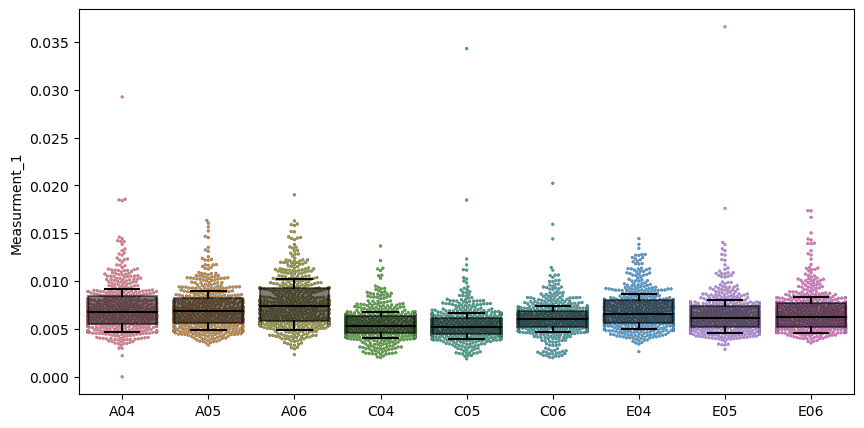

In [20]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])

plot = cv.cell_plot(df, measurement= "Measurement_1", size=2, identifier= "Metadata_Well")
plt.ylabel("Measurment_1")
plt.show()

In [21]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
0,0.010961,0.008471,0.005639,0.006151,0.008062,0.004680,0.006200,0.004471,0.004610
1,0.006141,0.007788,0.007943,0.005894,0.003827,0.006910,0.006476,0.005850,0.005652
2,0.010166,0.008000,0.005304,0.004808,0.004750,0.006358,0.006887,0.004823,0.006965
3,0.008829,0.007994,0.007532,0.006284,0.004841,0.006809,0.007606,0.004953,0.006171
4,0.007201,0.006701,0.004320,0.004837,0.007456,0.003801,0.006962,0.013379,0.010550
...,...,...,...,...,...,...,...,...,...
495,0.005419,0.008413,0.009835,0.002412,0.004707,0.006077,0.005056,0.006493,0.006558
496,0.006635,0.005548,0.008697,0.003397,0.005417,0.006765,0.006412,0.004783,0.006803
497,0.006964,0.007127,0.011224,0.008340,0.004558,0.004402,0.007044,0.007346,0.009290
498,0.008522,0.006611,0.004936,0.005109,0.005799,0.010078,0.009446,0.006377,0.008571


In [22]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.007184,0.007125,0.007718,0.005506,0.005502,0.006115,0.006992,0.006533,0.006708
std,0.002584,0.002135,0.002561,0.001599,0.002060,0.001774,0.001959,0.002282,0.002074
min,0.000000,0.003313,0.002316,0.002003,0.001883,0.001996,0.002626,0.002869,0.003537
25%,0.005506,0.005654,0.005797,0.004572,0.004478,0.005196,0.005657,0.005208,0.005233
50%,0.006782,0.006829,0.007403,0.005325,0.005184,0.006003,0.006608,0.006147,0.006258
75%,0.008414,0.008216,0.009232,0.006316,0.006177,0.006904,0.007987,0.007348,0.007663
max,0.029248,0.016334,0.019025,0.013671,0.034298,0.020222,0.014435,0.036580,0.017362


### Analyse replicate data and perform statistical analysis

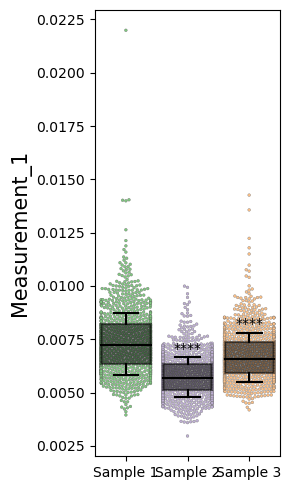

In [23]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Plot the data and specify the groupings and labels with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
Significance is calculated for every sample against the first using Dunnett’s multiple comparison test.
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, size=2, draw=True, obs_max=1000)
plt.tight_layout()
plt.show()

### View the dataframe generated from replicates and output the summary data

In [24]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"].head()

,Sample 1,Sample 2,Sample 3
0,0.006594,0.007276,0.004796
1,0.007075,0.006314,0.007972
2,0.006957,0.006470,0.005711
3,0.009171,0.006746,0.010976
4,0.008715,0.006273,0.007762


In [25]:
# p_values and significance levels of comparisons
plot["stats"]

,comparison,p_value,significance
0,Sample 1 vs Sample 2,0.0,****
0,Sample 1 vs Sample 3,0.0,****


In [26]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,Sample 1,Sample 2,Sample 3
count,1000.000000,1000.000000,1000.000000
mean,0.007396,0.005789,0.006744
std,0.001502,0.000973,0.001167
min,0.003947,0.002961,0.004188
25%,0.006354,0.005138,0.005932
50%,0.007223,0.005673,0.006567
75%,0.008198,0.006329,0.007378
max,0.021993,0.009990,0.014261


In [27]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()

,A04,A05,A06,C04,C05,C06,E04,E05,E06
0,0.006503,0.005654,0.008495,0.006413,0.004636,0.006099,0.009484,0.006808,0.006450
1,0.006820,0.005174,0.004437,0.005246,0.005243,0.005506,0.010401,0.008118,0.007160
2,0.007056,0.005273,0.009116,0.006490,0.005757,0.007240,0.003802,0.005735,0.003986
3,0.009133,0.009311,0.005492,0.009588,0.004148,0.003639,0.009774,0.002293,0.007476
4,0.008943,0.006625,0.006154,0.006490,0.006267,0.005685,0.005626,0.006119,0.006141
